#참고 문헌
link(diabetes): https://ieeexplore.ieee.org/abstract/document/8276012?casa_token=jcNMcAVq1sYAAAAA:_qzOSn2FykXk__xhr6Ne8VorYNvBwhczgFWosaUcJMUNEeptRka4_OhxtsY4XMXcmpfzKaAfZDg
        
link(xgboost): https://link.springer.com/article/10.1007/s41666-020-00077-1
link(전체적인과정) :https://www.mdpi.com/2075-4418/9/4/178
link(고혈압 영향요인참고) :https://europepmc.org/article/med/2468976
https://link.springer.com/article/10.1007/s11906-014-0483-3

In [1]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
# from pandas_profiling import ProfileReport
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [3]:
df1 =  pd.read_csv("C:\\Users\\shj06\\OneDrive\\바탕 화면\\비즈니스통계응용\\HN19_ALL.csv")
df2 =  pd.read_csv("C:\\Users\\shj06\\OneDrive\\바탕 화면\\비즈니스통계응용\\HN20_ALL.csv")
df2 =  pd.read_csv("C:\\Users\\shj06\\OneDrive\\바탕 화면\\비즈니스통계응용\\HN21_ALL.csv")

In [4]:
demo_list = ['ID',
             'year',
             'sex',
             'age']
ques_list = ['DI1_2',
             'DI2_2',
             'DE1_31',
             'DE1_32',
             'DE1_dg',
             'BD1_11',
             'BD2_1',
             'sm_presnt']
exam_list = ['HE_HPfh1',
             'HE_HPfh2',
             'HE_sbp',
             'HE_dbp',
             'HE_wt',
             'HE_wc',
             'HE_BMI',
             'HE_glu',
             'HE_HbA1c',
             'HE_chol',
             'HE_TG']
column_list = demo_list+ques_list+exam_list
column_list

['ID',
 'year',
 'sex',
 'age',
 'DI1_2',
 'DI2_2',
 'DE1_31',
 'DE1_32',
 'DE1_dg',
 'BD1_11',
 'BD2_1',
 'sm_presnt',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_sbp',
 'HE_dbp',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_TG']

In [5]:
df1_ = df1[column_list]
df2_ = df2[column_list]
print(df1_.shape)
print(df2_.shape)

(8110, 23)
(7359, 23)


In [6]:
raw_data = pd.concat([df1_,df2_],ignore_index=True)
raw_data.shape

(15469, 23)

In [7]:
raw_data.ID.duplicated().sum()

0

In [8]:
#결측치 제거

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         15469 non-null  object 
 1   year       15469 non-null  float64
 2   sex        15469 non-null  float64
 3   age        15469 non-null  float64
 4   DI1_2      14802 non-null  float64
 5   DI2_2      14802 non-null  float64
 6   DE1_31     14802 non-null  float64
 7   DE1_32     14802 non-null  float64
 8   DE1_dg     14802 non-null  float64
 9   BD1_11     14802 non-null  float64
 10  BD2_1      14802 non-null  float64
 11  sm_presnt  12048 non-null  float64
 12  HE_HPfh1   13409 non-null  float64
 13  HE_HPfh2   13409 non-null  float64
 14  HE_sbp     13479 non-null  float64
 15  HE_dbp     13479 non-null  float64
 16  HE_wt      14760 non-null  float64
 17  HE_wc      14073 non-null  float64
 18  HE_BMI     14659 non-null  float64
 19  HE_glu     13101 non-null  float64
 20  HE_HbA

In [10]:
def fillnan(value):
    if value == '.':
        value = np.nan
    return value
nanfill = raw_data.copy()
filled = nanfill.applymap(fillnan)
filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         15469 non-null  object 
 1   year       15469 non-null  float64
 2   sex        15469 non-null  float64
 3   age        15469 non-null  float64
 4   DI1_2      14802 non-null  float64
 5   DI2_2      14802 non-null  float64
 6   DE1_31     14802 non-null  float64
 7   DE1_32     14802 non-null  float64
 8   DE1_dg     14802 non-null  float64
 9   BD1_11     14802 non-null  float64
 10  BD2_1      14802 non-null  float64
 11  sm_presnt  12048 non-null  float64
 12  HE_HPfh1   13409 non-null  float64
 13  HE_HPfh2   13409 non-null  float64
 14  HE_sbp     13479 non-null  float64
 15  HE_dbp     13479 non-null  float64
 16  HE_wt      14760 non-null  float64
 17  HE_wc      14073 non-null  float64
 18  HE_BMI     14659 non-null  float64
 19  HE_glu     13101 non-null  float64
 20  HE_HbA

In [11]:
fix1 = filled.copy()
fix1.iloc[:,1:] = fix1.iloc[:,1:].apply(pd.to_numeric)
fix1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         15469 non-null  object 
 1   year       15469 non-null  float64
 2   sex        15469 non-null  float64
 3   age        15469 non-null  float64
 4   DI1_2      14802 non-null  float64
 5   DI2_2      14802 non-null  float64
 6   DE1_31     14802 non-null  float64
 7   DE1_32     14802 non-null  float64
 8   DE1_dg     14802 non-null  float64
 9   BD1_11     14802 non-null  float64
 10  BD2_1      14802 non-null  float64
 11  sm_presnt  12048 non-null  float64
 12  HE_HPfh1   13409 non-null  float64
 13  HE_HPfh2   13409 non-null  float64
 14  HE_sbp     13479 non-null  float64
 15  HE_dbp     13479 non-null  float64
 16  HE_wt      14760 non-null  float64
 17  HE_wc      14073 non-null  float64
 18  HE_BMI     14659 non-null  float64
 19  HE_glu     13101 non-null  float64
 20  HE_HbA

In [12]:
fix2 = fix1.copy()
fix2 = fix2.dropna().reset_index(drop=True)
fix2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         11573 non-null  object 
 1   year       11573 non-null  float64
 2   sex        11573 non-null  float64
 3   age        11573 non-null  float64
 4   DI1_2      11573 non-null  float64
 5   DI2_2      11573 non-null  float64
 6   DE1_31     11573 non-null  float64
 7   DE1_32     11573 non-null  float64
 8   DE1_dg     11573 non-null  float64
 9   BD1_11     11573 non-null  float64
 10  BD2_1      11573 non-null  float64
 11  sm_presnt  11573 non-null  float64
 12  HE_HPfh1   11573 non-null  float64
 13  HE_HPfh2   11573 non-null  float64
 14  HE_sbp     11573 non-null  float64
 15  HE_dbp     11573 non-null  float64
 16  HE_wt      11573 non-null  float64
 17  HE_wc      11573 non-null  float64
 18  HE_BMI     11573 non-null  float64
 19  HE_glu     11573 non-null  float64
 20  HE_HbA

In [13]:
#target data생성 

HE_sbp : 최종 수축기 혈압(2,3차 평균) 
HE_dbp   : 최종 이완기 혈압(2,3차 평균)
DI1_2: 혈압 보조제 복용 (1-8  로 구분 1로 갈수록 매일 복용 )

In [14]:
target_list = ['DI1_2','HE_sbp','HE_dbp']
target_df = fix2[target_list]
target_df.head()

,DI1_2,HE_sbp,HE_dbp
0,1.0,122.0,84.0
1,8.0,111.0,73.0
2,8.0,125.0,85.0
3,8.0,109.0,77.0
4,1.0,131.0,77.0


In [15]:
bp_drug = []
for i in fix2.DI1_2:
    if i < 5:
        bp_drug.append(1)
    else:
        bp_drug.append(0)
bp_drug = np.array(bp_drug)

target_df2 = target_df.copy()
target_df2['bp_drug'] = bp_drug
target_df2.head()

,DI1_2,HE_sbp,HE_dbp,bp_drug
0,1.0,122.0,84.0,1
1,8.0,111.0,73.0,0
2,8.0,125.0,85.0,0
3,8.0,109.0,77.0,0
4,1.0,131.0,77.0,1


In [16]:
hbp_us = []
for i in range(len(target_df2)):
    if (target_df2.loc[i,'HE_sbp']<130) & (target_df2.loc[i,'HE_dbp']<80) & (target_df2.loc[i,'bp_drug']==0):
        hbp_us.append(0)
    else:
        hbp_us.append(1)
hbp_us = np.array(hbp_us)
target_df3 = target_df2.copy()
target_df3['HBP_US'] = hbp_us
target_df3.head()

,DI1_2,HE_sbp,HE_dbp,bp_drug,HBP_US
0,1.0,122.0,84.0,1,1
1,8.0,111.0,73.0,0,0
2,8.0,125.0,85.0,0,1
3,8.0,109.0,77.0,0,0
4,1.0,131.0,77.0,1,1


In [17]:
hbp_eu = []
for i in range(len(target_df2)):
    if (target_df2.loc[i,'HE_sbp']<140) & (target_df2.loc[i,'HE_dbp']<90) & (target_df2.loc[i,'bp_drug']==0):
        hbp_eu.append(0)
    else:
        hbp_eu.append(1)
hbp_eu = np.array(hbp_eu)
target_df4 = target_df3.copy()
target_df4['HBP_EU'] = hbp_eu
target_df4.head()

,DI1_2,HE_sbp,HE_dbp,bp_drug,HBP_US,HBP_EU
0,1.0,122.0,84.0,1,1,1
1,8.0,111.0,73.0,0,0,0
2,8.0,125.0,85.0,0,1,0
3,8.0,109.0,77.0,0,0,0
4,1.0,131.0,77.0,1,1,1


In [18]:
target_df4.shape

(11573, 6)

In [19]:
target_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DI1_2    11573 non-null  float64
 1   HE_sbp   11573 non-null  float64
 2   HE_dbp   11573 non-null  float64
 3   bp_drug  11573 non-null  int32  
 4   HBP_US   11573 non-null  int32  
 5   HBP_EU   11573 non-null  int32  
dtypes: float64(3), int32(3)
memory usage: 407.0 KB


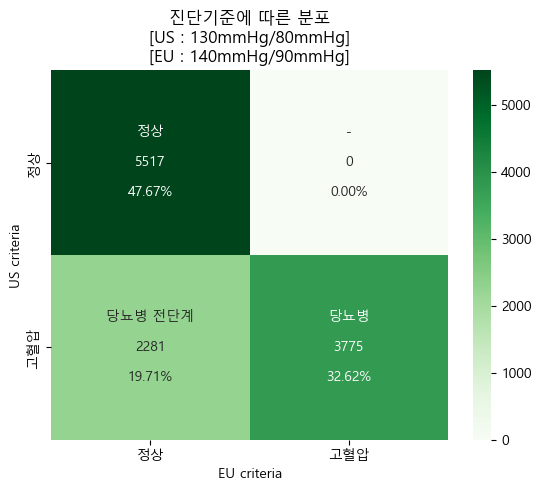

In [25]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(target_df4.HBP_US,target_df4.HBP_EU)
group_names = ['정상','-','당뇨병 전단계','당뇨병']
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
tick = ['정상','고혈압']
sns.heatmap(cfm, annot=labels, fmt='',cmap='Greens',xticklabels=tick,yticklabels=tick)
plt.xlabel('EU criteria')
plt.ylabel('US criteria')
plt.title('진단기준에 따른 분포\n[US : 130mmHg/80mmHg]\n[EU : 140mmHg/90mmHg]')
plt.show()

In [ ]:
#feature engineering 


In [33]:
fix2.shape

(11573, 23)

In [34]:
feature_df = fix2.drop(columns=target_list,axis=1)
feature_df.shape

(11573, 20)

In [35]:
feature_df0 = feature_df[demo_list]
feature_df0.columns = ['ID','year','sex','age']
feature_df0.sample(5,random_state=42)

,ID,year,sex,age
5379,N760288401,2019.0,2.0,53.0
3912,H790227201,2019.0,1.0,42.0
7093,A835210202,2020.0,2.0,52.0
6998,A831291801,2020.0,1.0,66.0
5769,O763317302,2019.0,2.0,67.0


In [36]:

heavy_drink = []
for i in range(len(feature_df)):
    if (feature_df.loc[i,'sex']==1) & (feature_df.loc[i,'BD1_11'] in [3,4,5,6]) & (feature_df.loc[i,'BD2_1'] in [4,5]):
        heavy_drink.append(1)
    elif (feature_df.loc[i,'sex']==2) & (feature_df.loc[i,'BD1_11'] in [3,4,5,6]) & (feature_df.loc[i,'BD2_1'] in [3,4,5]):
        heavy_drink.append(1)
    else:
        heavy_drink.append(0)
heavy_drink = np.array(heavy_drink)

feature_df1 = feature_df0.copy()
feature_df1['heavy_drink'] = heavy_drink
feature_df1.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink
5379,N760288401,2019.0,2.0,53.0,0
3912,H790227201,2019.0,1.0,42.0,1
7093,A835210202,2020.0,2.0,52.0,0
6998,A831291801,2020.0,1.0,66.0,1
5769,O763317302,2019.0,2.0,67.0,0


In [37]:
feature_df2 = feature_df1.copy()
feature_df2['smoke'] = feature_df['sm_presnt'].astype(int)
feature_df2.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke
5379,N760288401,2019.0,2.0,53.0,0,0
3912,H790227201,2019.0,1.0,42.0,1,0
7093,A835210202,2020.0,2.0,52.0,0,0
6998,A831291801,2020.0,1.0,66.0,1,0
5769,O763317302,2019.0,2.0,67.0,0,0


In [38]:
genetic = []
for i in range(len(feature_df)):
    if (feature_df.loc[i,'HE_HPfh1']==1) & (feature_df.loc[i,'HE_HPfh2']==1):
        genetic.append(2)
    elif (feature_df.loc[i,'HE_HPfh1']==1) & (feature_df.loc[i,'HE_HPfh2']!=1):
        genetic.append(1.5)
    elif (feature_df.loc[i,'HE_HPfh1']!=1) & (feature_df.loc[i,'HE_HPfh2']==1):
        genetic.append(1.5)
    else:
        genetic.append(1)
genetic = np.array(genetic)
feature_df3 = feature_df2.copy()
feature_df3['genetic_hbp'] = genetic
feature_df3.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp
5379,N760288401,2019.0,2.0,53.0,0,0,1.5
3912,H790227201,2019.0,1.0,42.0,1,0,1.5
7093,A835210202,2020.0,2.0,52.0,0,0,2.0
6998,A831291801,2020.0,1.0,66.0,1,0,1.0
5769,O763317302,2019.0,2.0,67.0,0,0,1.0


In [39]:
exam_list0 = ['HE_wt','HE_wc','HE_BMI']
exam_list1 = ['weight','waist','BMI']
feature_df4 = feature_df3.copy()
feature_df4[exam_list1] = feature_df[exam_list0].astype(float)
feature_df4.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI
5379,N760288401,2019.0,2.0,53.0,0,0,1.5,68.7,89.5,25.636538
3912,H790227201,2019.0,1.0,42.0,1,0,1.5,63.3,88.1,23.708256
7093,A835210202,2020.0,2.0,52.0,0,0,2.0,57.6,83.2,22.956841
6998,A831291801,2020.0,1.0,66.0,1,0,1.0,67.4,84.3,21.957945
5769,O763317302,2019.0,2.0,67.0,0,0,1.0,50.1,83.6,20.586785


In [40]:
diabetes = []
for i in range(len(feature_df)):
    if (feature_df.loc[i,'DE1_31']!=1) & (feature_df.loc[i,'DE1_32']!=1) & (feature_df.loc[i,'DE1_dg']!=1) & (feature_df.loc[i,'HE_glu']<126) & (feature_df.loc[i,'HE_HbA1c']<6.5):
        diabetes.append(0)
    else:
        diabetes.append(1)
diabetes = np.array(diabetes)

feature_df5 = feature_df4.copy()
feature_df5['diabetes'] = diabetes
feature_df5.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI,diabetes
5379,N760288401,2019.0,2.0,53.0,0,0,1.5,68.7,89.5,25.636538,0
3912,H790227201,2019.0,1.0,42.0,1,0,1.5,63.3,88.1,23.708256,0
7093,A835210202,2020.0,2.0,52.0,0,0,2.0,57.6,83.2,22.956841,0
6998,A831291801,2020.0,1.0,66.0,1,0,1.0,67.4,84.3,21.957945,0
5769,O763317302,2019.0,2.0,67.0,0,0,1.0,50.1,83.6,20.586785,1


In [41]:
hyper_chol = []
for i in range(len(feature_df)):
    if (feature_df.loc[i,'DI2_2'] > 4) & (feature_df.loc[i,'HE_chol'] < 240):
        hyper_chol.append(0)
    else:
        hyper_chol.append(1)
hyper_chol = np.array(hyper_chol)
feature_df6 = feature_df5.copy()
feature_df6['hyper_chol'] = hyper_chol
feature_df6.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI,diabetes,hyper_chol
5379,N760288401,2019.0,2.0,53.0,0,0,1.5,68.7,89.5,25.636538,0,0
3912,H790227201,2019.0,1.0,42.0,1,0,1.5,63.3,88.1,23.708256,0,1
7093,A835210202,2020.0,2.0,52.0,0,0,2.0,57.6,83.2,22.956841,0,0
6998,A831291801,2020.0,1.0,66.0,1,0,1.0,67.4,84.3,21.957945,0,0
5769,O763317302,2019.0,2.0,67.0,0,0,1.0,50.1,83.6,20.586785,1,0


In [42]:
feature_df7 = feature_df6.copy()
feature_df7['triglycerides'] = feature_df['HE_TG'].astype(float)
feature_df7.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI,diabetes,hyper_chol,triglycerides
5379,N760288401,2019.0,2.0,53.0,0,0,1.5,68.7,89.5,25.636538,0,0,55.0
3912,H790227201,2019.0,1.0,42.0,1,0,1.5,63.3,88.1,23.708256,0,1,78.0
7093,A835210202,2020.0,2.0,52.0,0,0,2.0,57.6,83.2,22.956841,0,0,83.0
6998,A831291801,2020.0,1.0,66.0,1,0,1.0,67.4,84.3,21.957945,0,0,132.0
5769,O763317302,2019.0,2.0,67.0,0,0,1.0,50.1,83.6,20.586785,1,0,62.0


In [43]:

print('feature : {}'.format(feature_df7.shape))
print('target : {}'.format(target_df4.shape))

feature : (11573, 13)
target : (11573, 6)


In [44]:
fix_data0 = feature_df7.copy()
fix_data0[['HBP_US','HBP_EU']] = target_df4[['HBP_US','HBP_EU']]
fix_data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11573 non-null  object 
 1   year           11573 non-null  float64
 2   sex            11573 non-null  float64
 3   age            11573 non-null  float64
 4   heavy_drink    11573 non-null  int32  
 5   smoke          11573 non-null  int32  
 6   genetic_hbp    11573 non-null  float64
 7   weight         11573 non-null  float64
 8   waist          11573 non-null  float64
 9   BMI            11573 non-null  float64
 10  diabetes       11573 non-null  int32  
 11  hyper_chol     11573 non-null  int32  
 12  triglycerides  11573 non-null  float64
 13  HBP_US         11573 non-null  int32  
 14  HBP_EU         11573 non-null  int32  
dtypes: float64(8), int32(6), object(1)
memory usage: 1.1+ MB


In [45]:
#상관관계 확인 다중공선성 노이즈 제거

In [49]:
numeric_columns = fix_data0.select_dtypes(include=['number']).columns
numeric_data = fix_data0[numeric_columns]
corr0 = numeric_data.corr(method='pearson')

In [50]:
check_features0 = fix_data0.iloc[:,2:-2]
feat_corr0 = check_features0.corr(method='pearson')
feat_corr0.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI,diabetes,hyper_chol,triglycerides
sex,1.000000,0.038326,-0.248890,-0.350524,0.040384,-0.527505,-0.352720,-0.157297,-0.051748,0.074212,-0.194612
age,0.038326,1.000000,-0.259724,-0.124239,-0.140292,-0.212365,0.240594,0.043602,0.297689,0.286857,0.047392
heavy_drink,-0.248890,-0.259724,1.000000,0.287233,0.036807,0.225755,0.078772,0.071428,-0.034885,-0.053002,0.154579
smoke,-0.350524,-0.124239,0.287233,1.000000,-0.024376,0.195278,0.096584,0.035018,0.016959,-0.038498,0.167180
genetic_hbp,0.040384,-0.140292,0.036807,-0.024376,1.000000,0.068481,-0.000316,0.054931,-0.044133,0.017839,0.017991
weight,-0.527505,-0.212365,0.225755,0.195278,0.068481,1.000000,0.801364,0.811436,0.080922,0.003831,0.257491
waist,-0.352720,0.240594,0.078772,0.096584,-0.000316,0.801364,1.000000,0.874863,0.262076,0.177944,0.291078
BMI,-0.157297,0.043602,0.071428,0.035018,0.054931,0.811436,0.874863,1.000000,0.179460,0.132861,0.242986
diabetes,-0.051748,0.297689,-0.034885,0.016959,-0.044133,0.080922,0.262076,0.179460,1.000000,0.211524,0.116015
hyper_chol,0.074212,0.286857,-0.053002,-0.038498,0.017839,0.003831,0.177944,0.132861,0.211524,1.000000,0.125274


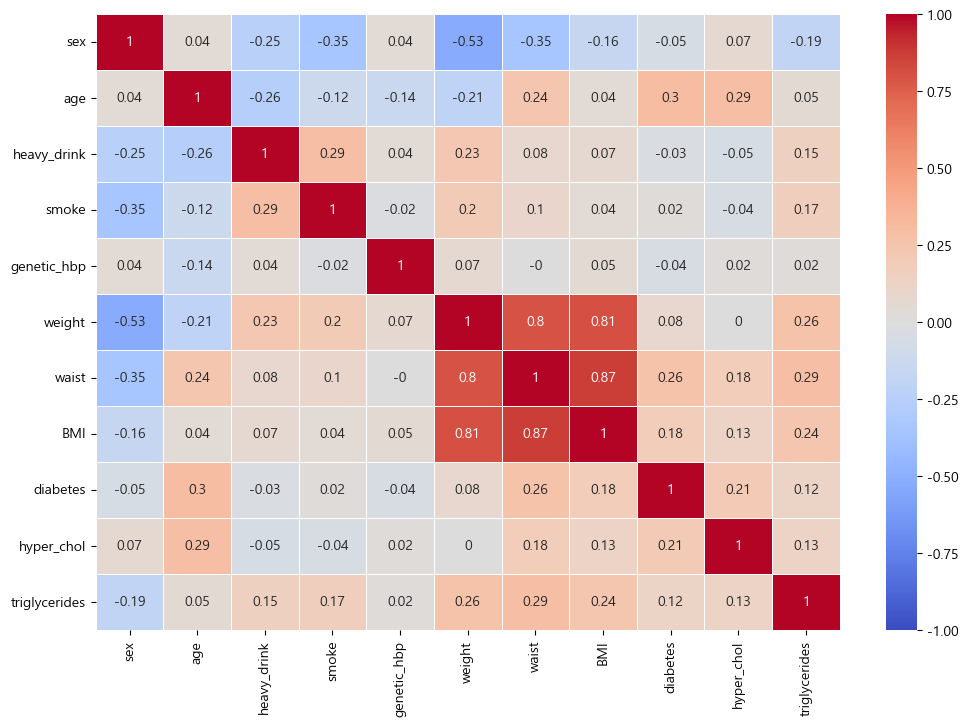

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(feat_corr0.round(2),
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            vmin=-1,
            vmax=1)
plt.show()

In [52]:
drop_list = ['weight','waist']
fix_data = fix_data0.copy()
fix_data = fix_data.drop(columns=drop_list,axis=1)
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11573 non-null  object 
 1   year           11573 non-null  float64
 2   sex            11573 non-null  float64
 3   age            11573 non-null  float64
 4   heavy_drink    11573 non-null  int32  
 5   smoke          11573 non-null  int32  
 6   genetic_hbp    11573 non-null  float64
 7   BMI            11573 non-null  float64
 8   diabetes       11573 non-null  int32  
 9   hyper_chol     11573 non-null  int32  
 10  triglycerides  11573 non-null  float64
 11  HBP_US         11573 non-null  int32  
 12  HBP_EU         11573 non-null  int32  
dtypes: float64(6), int32(6), object(1)
memory usage: 904.3+ KB


In [53]:
check_features = fix_data.iloc[:,2:-2]
corr = check_features.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,sex,age,heavy_drink,smoke,genetic_hbp,BMI,diabetes,hyper_chol,triglycerides
sex,1.000000,0.038326,-0.248890,-0.350524,0.040384,-0.157297,-0.051748,0.074212,-0.194612
age,0.038326,1.000000,-0.259724,-0.124239,-0.140292,0.043602,0.297689,0.286857,0.047392
heavy_drink,-0.248890,-0.259724,1.000000,0.287233,0.036807,0.071428,-0.034885,-0.053002,0.154579
smoke,-0.350524,-0.124239,0.287233,1.000000,-0.024376,0.035018,0.016959,-0.038498,0.167180
genetic_hbp,0.040384,-0.140292,0.036807,-0.024376,1.000000,0.054931,-0.044133,0.017839,0.017991
BMI,-0.157297,0.043602,0.071428,0.035018,0.054931,1.000000,0.179460,0.132861,0.242986
diabetes,-0.051748,0.297689,-0.034885,0.016959,-0.044133,0.179460,1.000000,0.211524,0.116015
hyper_chol,0.074212,0.286857,-0.053002,-0.038498,0.017839,0.132861,0.211524,1.000000,0.125274
triglycerides,-0.194612,0.047392,0.154579,0.167180,0.017991,0.242986,0.116015,0.125274,1.000000


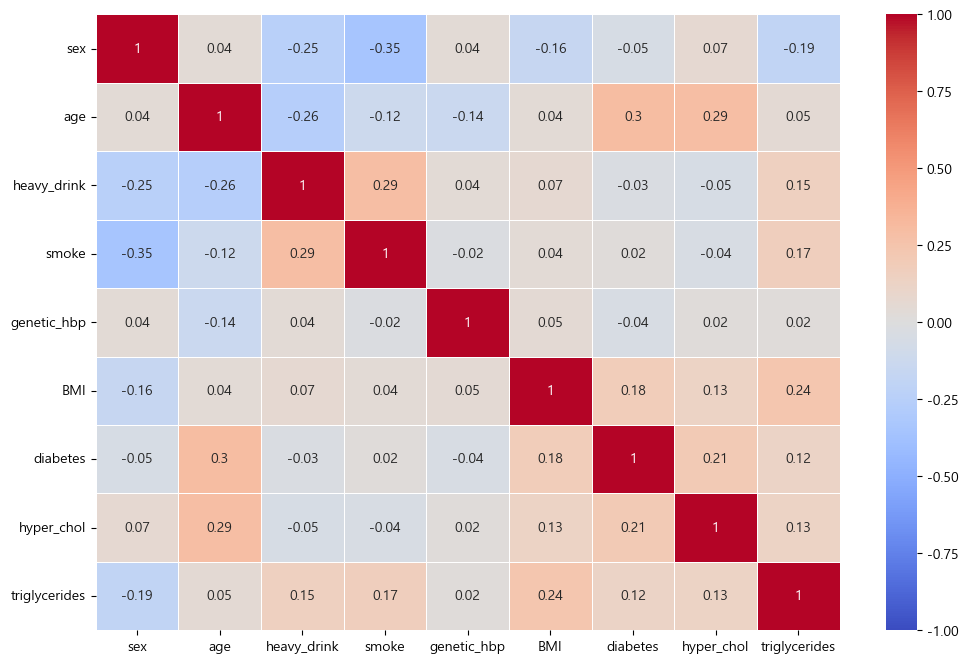

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(corr.round(2),
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            vmin=-1,
            vmax=1)
plt.show()

In [55]:
#이상치 제거 (noize 제거)

In [56]:
fix_data.shape

(11573, 13)

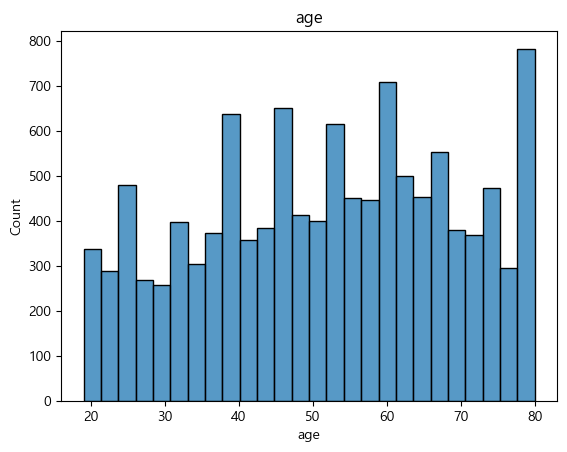

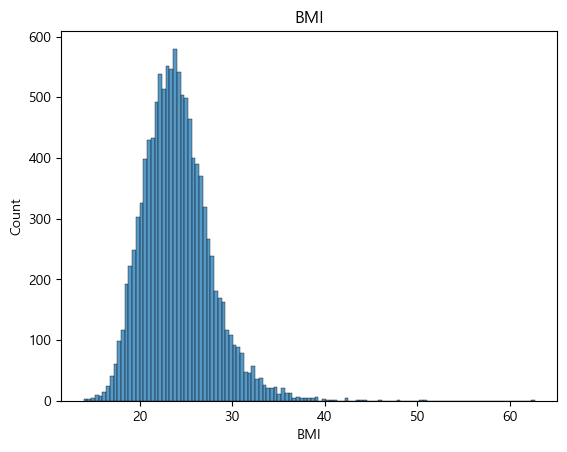

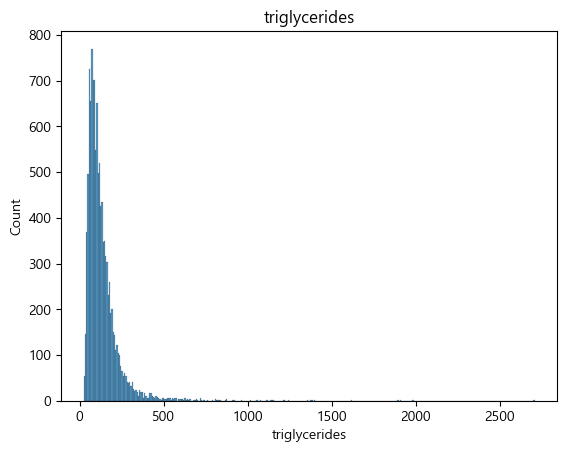

In [57]:
num_cols = ['age','BMI','triglycerides']
for i in num_cols:
    sns.histplot(x=i,data=fix_data)
    plt.title(i)
    plt.show()


이상치 기준 : 심각 수준 이상인 경우

체질량지수(BMI)
40kg 이상
중성지방(Triglyceride)
500mg이상

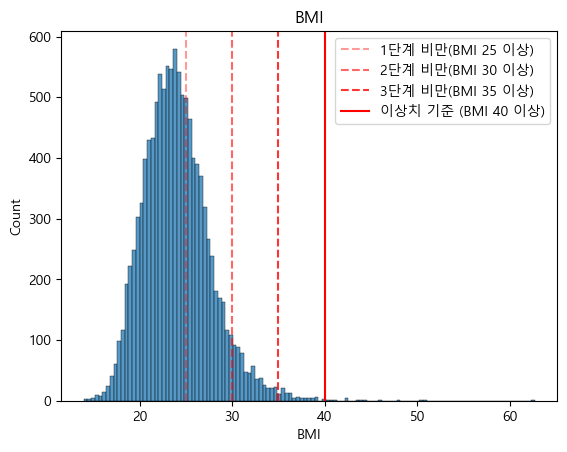

In [58]:
sns.histplot(x='BMI',data=fix_data)
plt.axvline(25,label='1단계 비만(BMI 25 이상)',linestyle='--',color='red',alpha=0.4)
plt.axvline(30,label='2단계 비만(BMI 30 이상)',linestyle='--',color='red',alpha=0.6)
plt.axvline(35,label='3단계 비만(BMI 35 이상)',linestyle='--',color='red',alpha=0.8)
plt.axvline(40,label='이상치 기준 (BMI 40 이상)',linestyle='-',color='red',alpha=1)
plt.legend()
plt.title('BMI')
plt.show()

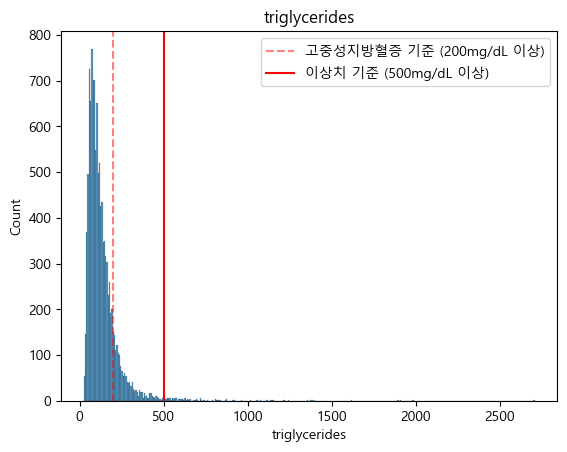

In [59]:
sns.histplot(x='triglycerides',data=fix_data)
plt.axvline(200,label='고중성지방혈증 기준 (200mg/dL 이상)',linestyle='--',color='red',alpha=0.5)
plt.axvline(500,label='이상치 기준 (500mg/dL 이상)',linestyle='-',color='red',alpha=1)
plt.legend()
plt.title('triglycerides')
plt.show()

In [60]:
fix_data.shape

(11573, 13)

In [61]:
outlier_BMI = fix_data.query('BMI >= 40')
len(outlier_BMI)

17

In [62]:
fix_data1 = fix_data.drop(index=outlier_BMI.index).reset_index(drop=True)
fix_data1.shape

(11556, 13)

In [63]:
outlier_chol = fix_data1.query('triglycerides >= 500')
len(outlier_chol)

134

In [64]:
fix_data2 = fix_data1.drop(index=outlier_chol.index).reset_index(drop=True)
fix_data2.shape

(11422, 13)

In [ ]:
#최종 data EDA 와 저장 

In [65]:
final_data = fix_data2.copy()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11422 entries, 0 to 11421
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11422 non-null  object 
 1   year           11422 non-null  float64
 2   sex            11422 non-null  float64
 3   age            11422 non-null  float64
 4   heavy_drink    11422 non-null  int32  
 5   smoke          11422 non-null  int32  
 6   genetic_hbp    11422 non-null  float64
 7   BMI            11422 non-null  float64
 8   diabetes       11422 non-null  int32  
 9   hyper_chol     11422 non-null  int32  
 10  triglycerides  11422 non-null  float64
 11  HBP_US         11422 non-null  int32  
 12  HBP_EU         11422 non-null  int32  
dtypes: float64(6), int32(6), object(1)
memory usage: 892.5+ KB


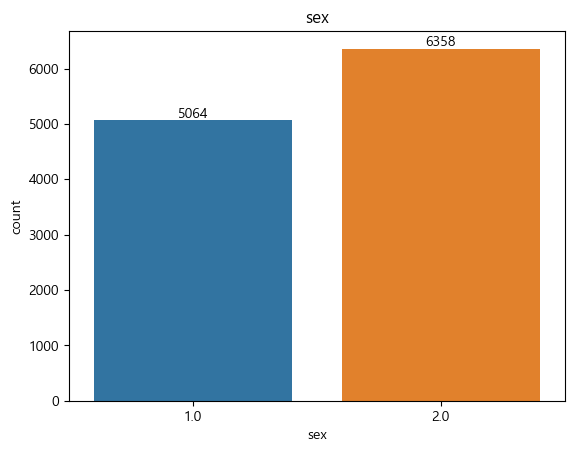

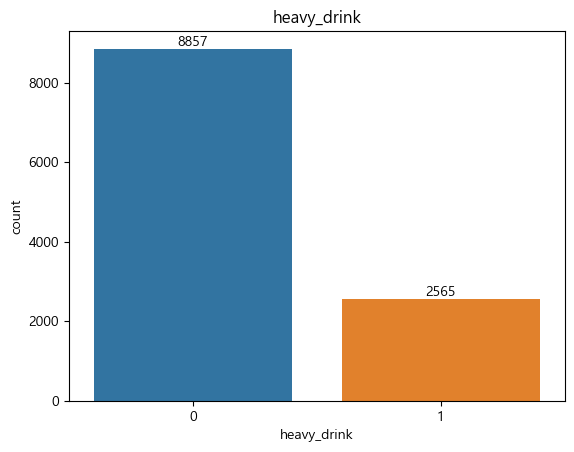

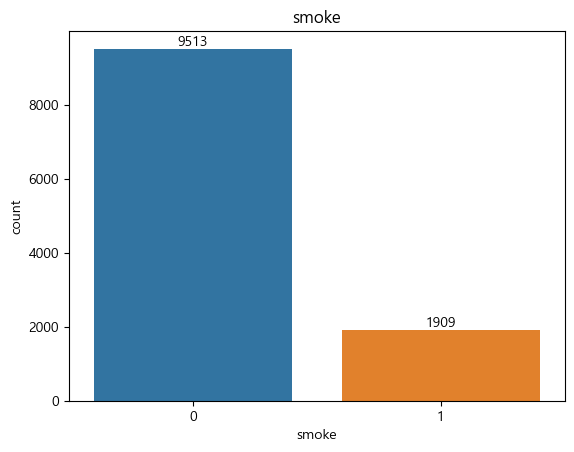

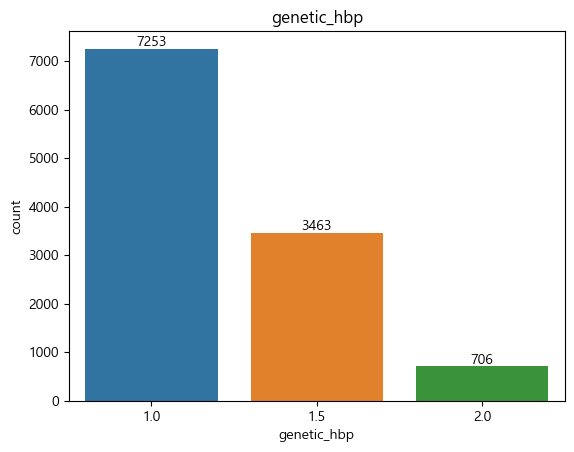

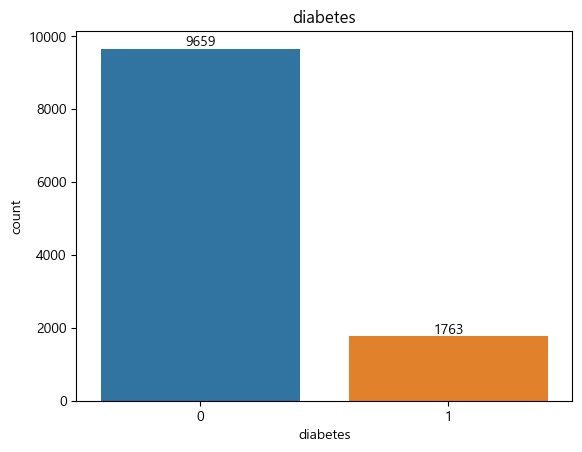

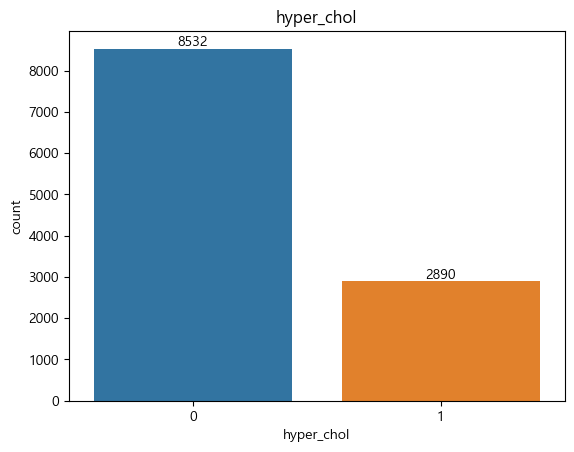

In [66]:

cat_cols = ['sex','heavy_drink','smoke','genetic_hbp','diabetes','hyper_chol']
for i in cat_cols:
    ax = sns.countplot(x=i,data=final_data)
    ax.bar_label(ax.containers[0])
    plt.title(i)
    plt.show()

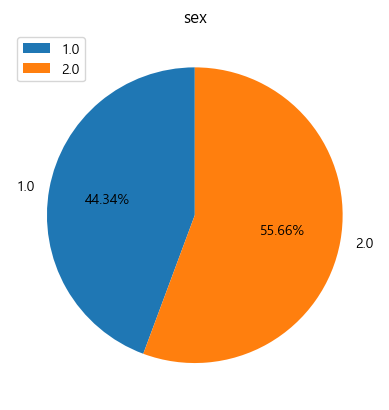

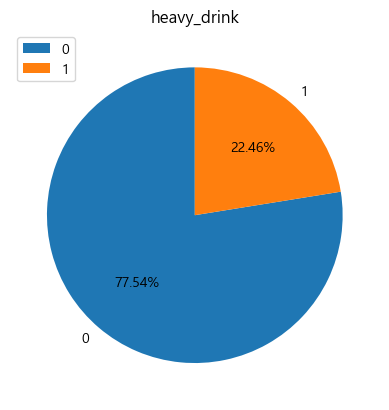

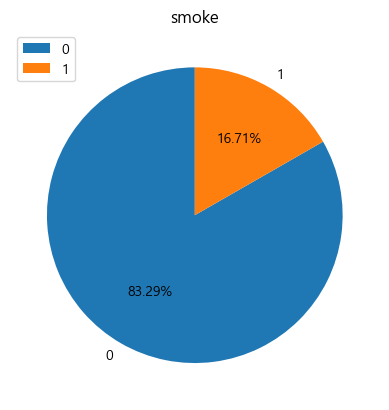

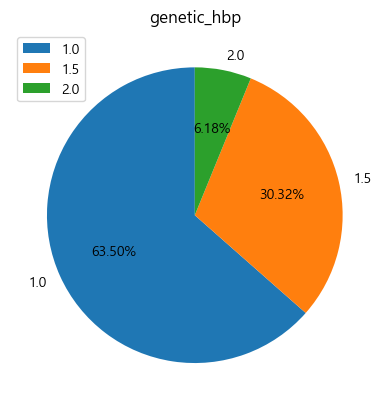

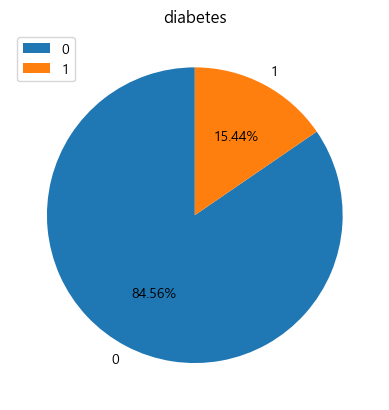

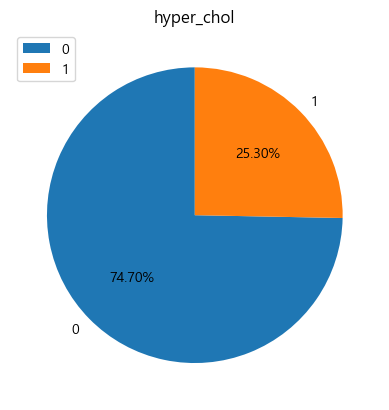

In [67]:
for i in cat_cols:
    count_cat = final_data[i].value_counts().sort_index()
    count_label = count_cat.index
    plt.pie(x = count_cat,labels=count_label,autopct='%.2f%%',startangle=90)
    plt.title(i)
    plt.legend(loc = 'upper left')
    plt.show()

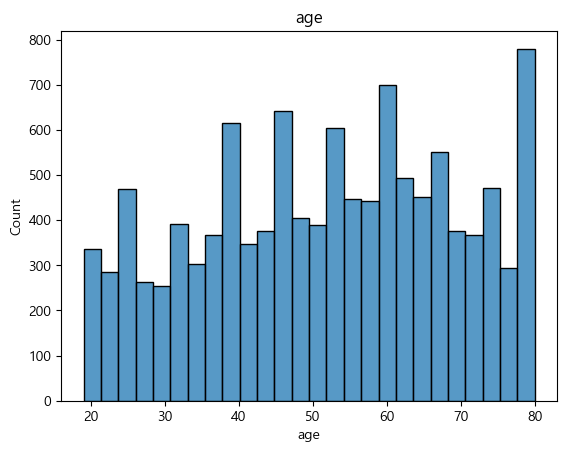

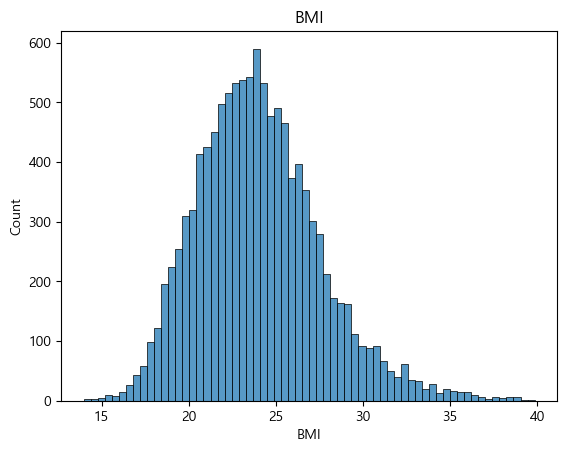

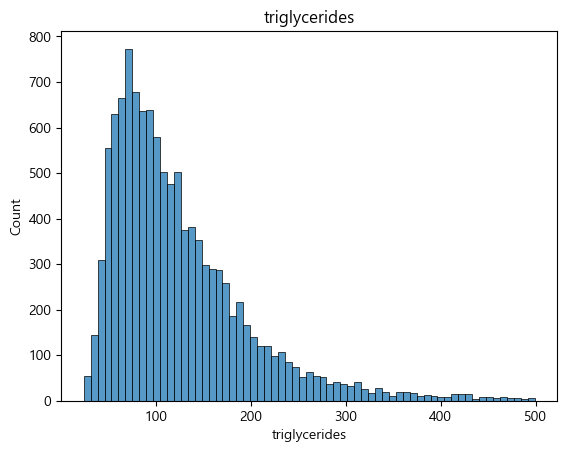

In [68]:
for i in num_cols:
    sns.histplot(x=i,data=final_data)
    plt.title(i)
    plt.show()

,sex,age,heavy_drink,smoke,genetic_hbp,BMI,diabetes,hyper_chol,triglycerides
sex,1.000000,0.035612,-0.243173,-0.347957,0.040761,-0.156919,-0.049934,0.079979,-0.204335
age,0.035612,1.000000,-0.260085,-0.120789,-0.140791,0.058484,0.300801,0.291160,0.093300
heavy_drink,-0.243173,-0.260085,1.000000,0.279649,0.037421,0.068973,-0.038275,-0.060806,0.127194
smoke,-0.347957,-0.120789,0.279649,1.000000,-0.025048,0.026922,0.015162,-0.044809,0.155162
genetic_hbp,0.040761,-0.140791,0.037421,-0.025048,1.000000,0.058383,-0.043711,0.018094,0.024352
BMI,-0.156919,0.058484,0.068973,0.026922,0.058383,1.000000,0.178477,0.135811,0.294092
diabetes,-0.049934,0.300801,-0.038275,0.015162,-0.043711,0.178477,1.000000,0.211217,0.130467
hyper_chol,0.079979,0.291160,-0.060806,-0.044809,0.018094,0.135811,0.211217,1.000000,0.131023
triglycerides,-0.204335,0.093300,0.127194,0.155162,0.024352,0.294092,0.130467,0.131023,1.000000


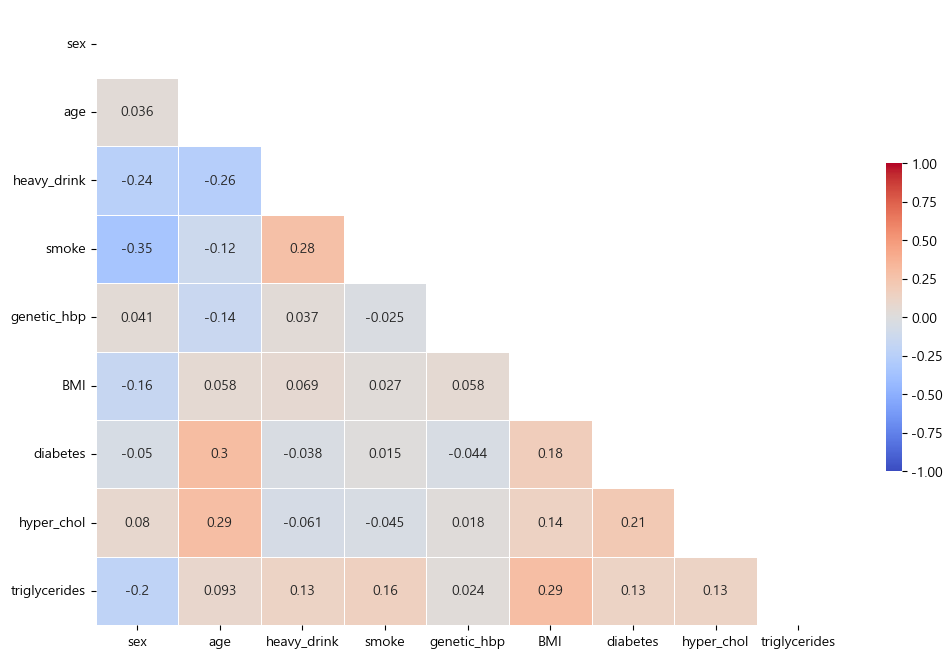

In [69]:
final_feature = final_data.drop(["ID","year","HBP_US","HBP_EU"],axis=1)
corr_final = final_feature.corr(method='pearson')
display(corr_final.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1))
fig, ax = plt.subplots(figsize=(12,8))
mask = np.zeros_like(corr_final,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_final,
            cmap='coolwarm',
            annot=True,
            mask=mask,
            linewidths=.5,
            cbar_kws={'shrink':.5},
            vmin=-1,
            vmax=1)
plt.show()

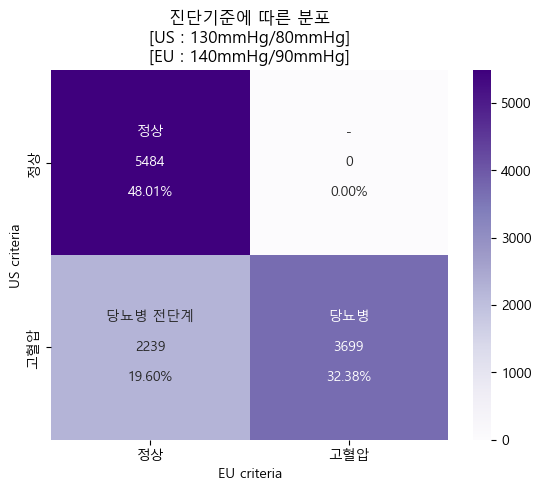

In [70]:
cfm_final = confusion_matrix(final_data.HBP_US,final_data.HBP_EU)
group_names = ['정상','-','당뇨병 전단계','당뇨병']
group_counts = ['{0:0.0f}'.format(value) for value in cfm_final.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm_final.flatten()/np.sum(cfm_final)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
tick = ['정상','고혈압']
sns.heatmap(cfm_final, annot=labels, fmt='',cmap='Purples',xticklabels=tick,yticklabels=tick)
plt.xlabel('EU criteria')
plt.ylabel('US criteria')
plt.title('진단기준에 따른 분포\n[US : 130mmHg/80mmHg]\n[EU : 140mmHg/90mmHg]')
plt.show()

Target(HBP_US) 비율


HBP_US
1    0.519874
0    0.480126
Name: proportion, dtype: float64

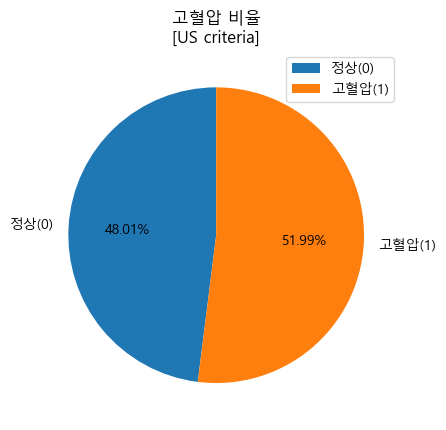

In [71]:
count_us = final_data.HBP_US.value_counts().sort_index()
count_label = ['정상(0)','고혈압(1)']
print('Target(HBP_US) 비율')
display(final_data.HBP_US.value_counts(normalize=True))
plt.pie(x = count_us,labels=count_label,autopct='%.2f%%',startangle=90)
plt.legend(loc = 'upper right')
plt.title('고혈압 비율\n[US criteria]')
plt.show()

Target(HBP_EU) 비율


HBP_EU
0    0.676151
1    0.323849
Name: proportion, dtype: float64

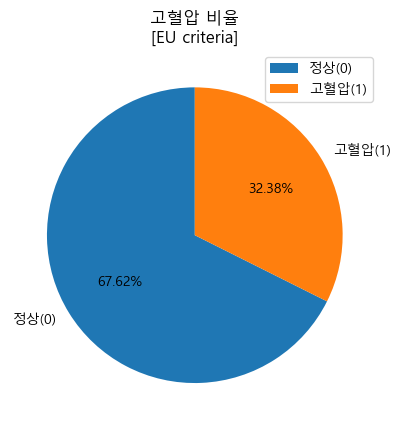

In [72]:
count_eu = final_data.HBP_EU.value_counts().sort_index()
count_label = ['정상(0)','고혈압(1)']
print('Target(HBP_EU) 비율')
display(final_data.HBP_EU.value_counts(normalize=True))
plt.pie(x = count_eu,labels=count_label,autopct='%.2f%%',startangle=90)
plt.legend(loc = 'upper right')
plt.title('고혈압 비율\n[EU criteria]')
plt.show()

In [80]:
final_data.to_csv("df_final.csv", index=False)